## Observations and Insights 

In [260]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [261]:
# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='inner', on="Mouse ID")
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [262]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].count()
mouse_count

1893

In [263]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_rows = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [264]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mice_rows = combined_data_df[combined_data_df.duplicated("Mouse ID")]
all_duplicate_mice_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [265]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [266]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [267]:
combined_data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

## Summary Statistics

In [268]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combined_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summ_stats_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": var,
    "Standard Deviation": std_dev,
    "SEM": sem
})
summ_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

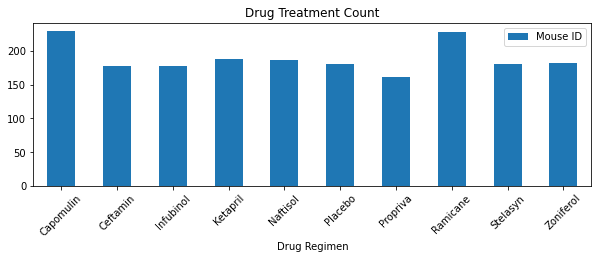

<Figure size 432x288 with 0 Axes>

In [269]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
each_drug_regimen = pd.DataFrame(combined_data_df.groupby(["Drug Regimen"]).count()).reset_index()
each_drug_regimen_df = each_drug_regimen[["Drug Regimen", "Mouse ID"]]
each_drug_regimen_df = each_drug_regimen_df.set_index("Drug Regimen")
each_drug_regimen_df.plot(kind="bar", figsize=(10,3), rot=45)
plt.title("Drug Treatment Count")
plt.show()
plt.tight_layout()

In [270]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tot_no_measurement = summ_stats_df.index.tolist()
tot_no_measurement

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [271]:
drug_count = (combined_data_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [272]:
x_axis = np.arange(len(drug_count))

Text(0, 0.5, 'Count')

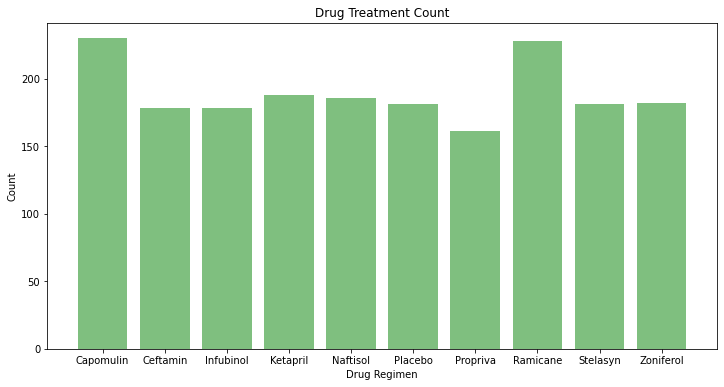

In [273]:
x_axis = tot_no_measurement
plt.figure(figsize=(12,6))
plt.bar(x_axis,drug_count, color='g', alpha=0.5, align="center")
plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")


In [274]:
plt.clf()
plt.cla()
plt.close()

In [275]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female_df = pd.DataFrame(combined_data_df.groupby(["Sex"]).count()).reset_index()
male_female_df = male_female_df[["Sex", "Mouse ID"]]
male_female_df

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

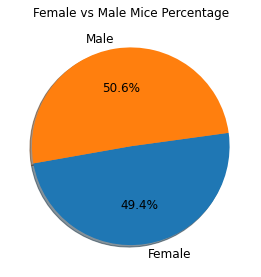

In [276]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2, 2, 1)
male_female_df.plot(kind="pie", y="Mouse ID", ax=ax1, autopct='%1.1f%%',
                    startangle=190, shadow=True, labels=male_female_df["Sex"], legend=False, fontsize=12)
plt.title("Female vs Male Mice Percentage")
plt.xlabel("")
plt.ylabel("")

In [277]:
plt.clf()
plt.cla()
plt.close()

In [278]:
gender_cnt = (combined_data_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_cnt

[935, 958]

(-1.190022637646879,
 1.112955339938407,
 -1.2254561692872417,
 1.1150985725624567)

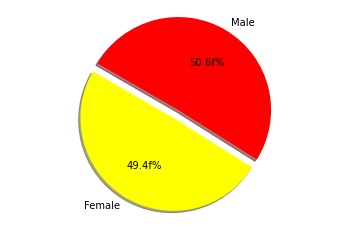

In [279]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
colors = ["yellow","red"]
explode = (0.1,0)

plt.pie(gender_cnt,explode=explode, labels=labels, colors=colors, autopct="%1.1ff%%",
       shadow=True, startangle=150)
plt.axis("equal")


In [280]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [281]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_data_df.head()
# Start by getting the last (greatest) timepoint for each mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [282]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_group_df = combined_data_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
calulate_timepoint = merged_group_df.loc[merged_group_df["Timepoint"] == 45]
calulate_timepoint.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


## Line and Scatter Plots

In [283]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_df = calulate_timepoint[calulate_timepoint["Drug Regimen"].isin(["Capomulin"])]
capo_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [284]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_obj = capo_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capo_obj = capo_obj["Tumor Volume (mm3)"]
capo_obj

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [285]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

quartiles = capo_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f" The lower qartile of temperature is: {lowerq}")
print(f" The upper qartile of temperature is: {upperq}")
print(f" The interquartile qartile of temperature is: {iqr}")
print(f" The median of temperature is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are the outliners.")
print(f"Values below {upper_bound} are the outliners.")

 The lower qartile of temperature is: 32.37735684
 The upper qartile of temperature is: 40.1592203
 The interquartile qartile of temperature is: 7.781863460000004
 The median of temperature is: 37.31184577
Values below 20.70456164999999 are the outliners.
Values below 51.83201549 are the outliners.


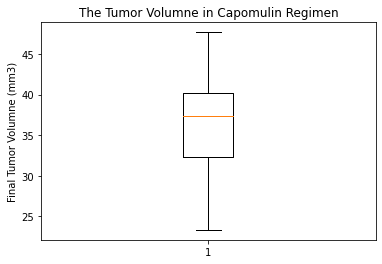

In [286]:
# Generate a box plot of the final tumor volume of each mouse for Capomulin of interest
fig1, ax1 = plt.subplots()
ax1.set_title("The Tumor Volumne in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volumne (mm3)")
ax1.boxplot(capo_obj)
plt.show()

In [287]:
# Generate a data for the "Ramicane" regimen
rami_obj_df = calulate_timepoint[calulate_timepoint["Drug Regimen"].isin(["Ramicane"])]
rami_obj_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,327,a411,Ramicane,Male,3,22,45,38.407618,1
1,430,a444,Ramicane,Female,10,25,45,43.047543,0
2,214,a520,Ramicane,Male,13,21,45,38.810366,1
3,174,a644,Ramicane,Female,7,17,45,32.978522,1
4,154,c758,Ramicane,Male,9,17,45,33.397653,1


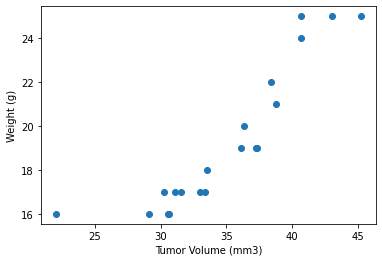

In [288]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Ramicane regimen
rami_obj = rami_obj_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
rami_obj = rami_obj["Tumor Volume (mm3)"]
rami_obj
x_axis = rami_obj_df["Tumor Volume (mm3)"]
y_axis = rami_obj_df["Weight (g)"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

In [289]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

quartiles = rami_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f" The lower qartile of temperature is: {lowerq}")
print(f" The upper qartile of temperature is: {upperq}")
print(f" The interquartile qartile of temperature is: {iqr}")
print(f" The median of temperature is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are the outliners.")
print(f"Values below {upper_bound} are the outliners.")

 The lower qartile of temperature is: 30.981175224999998
 The upper qartile of temperature is: 38.508305307499995
 The interquartile qartile of temperature is: 7.527130082499998
 The median of temperature is: 34.848627300000004
Values below 19.690480101250003 are the outliners.
Values below 49.79900043124999 are the outliners.


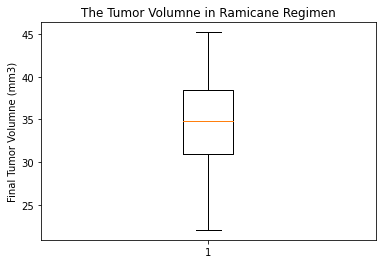

In [290]:
# Generate a box plot of the final tumor volume of each mouse across Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title("The Tumor Volumne in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volumne (mm3)")
ax1.boxplot(rami_obj)
plt.show()

In [291]:
# Generate a data for the "Infubinol" regimen
infu_obj_df = calulate_timepoint[calulate_timepoint["Drug Regimen"].isin(["Infubinol"])]
infu_obj_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,463,a203,Infubinol,Female,20,23,45,67.973419,2
1,473,a251,Infubinol,Female,21,25,45,65.525743,1
2,540,a685,Infubinol,Male,8,30,45,66.083066,3
3,637,c139,Infubinol,Male,11,28,45,72.226731,2
4,800,e476,Infubinol,Male,23,26,45,62.435404,1


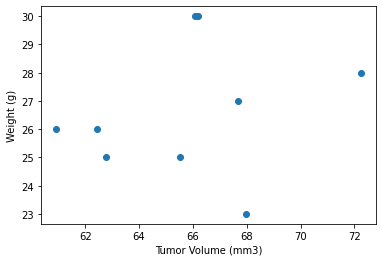

In [292]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Infubinol regimen
infu_obj = infu_obj_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infu_obj = infu_obj["Tumor Volume (mm3)"]
infu_obj
x_axis = infu_obj_df["Tumor Volume (mm3)"]
y_axis = infu_obj_df["Weight (g)"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

In [293]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

quartiles = infu_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f" The lower qartile of temperature is: {lowerq}")
print(f" The upper qartile of temperature is: {upperq}")
print(f" The interquartile qartile of temperature is: {iqr}")
print(f" The median of temperature is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are the outliners.")
print(f"Values below {upper_bound} are the outliners.")

 The lower qartile of temperature is: 62.75445141
 The upper qartile of temperature is: 67.68556862
 The interquartile qartile of temperature is: 4.9311172099999965
 The median of temperature is: 66.08306589
Values below 55.35777559500001 are the outliners.
Values below 75.08224443499999 are the outliners.


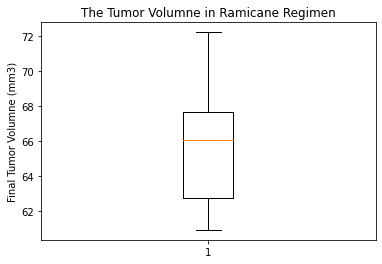

In [294]:
# Generate a box plot of the final tumor volume of each mouse across for Infubinol Regiment
fig1, ax1 = plt.subplots()
ax1.set_title("The Tumor Volumne in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volumne (mm3)")
ax1.boxplot(infu_obj)
plt.show()

In [295]:
# Generate a data for the "Ceftamin" regimen
ceft_obj_df = calulate_timepoint[calulate_timepoint["Drug Regimen"].isin(["Ceftamin"])]
ceft_obj_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,493,a275,Ceftamin,Female,20,28,45,62.999356,3
1,993,j296,Ceftamin,Female,24,30,45,61.849023,3
2,1033,k210,Ceftamin,Male,15,28,45,68.923185,3
3,1112,l471,Ceftamin,Female,7,28,45,67.748662,1
4,1132,l661,Ceftamin,Male,18,26,45,59.851956,3


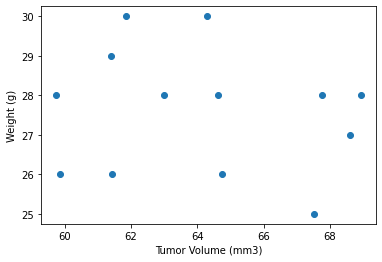

In [296]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Ceftamin regimen
ceft_obj = ceft_obj_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceft_obj = ceft_obj_df["Tumor Volume (mm3)"]
ceft_obj
x_axis = ceft_obj_df["Tumor Volume (mm3)"]
y_axis = ceft_obj_df["Weight (g)"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()

In [297]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create empty list to fill with tumor vol data (for plotting)
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 

quartiles = ceft_obj.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f" The lower qartile of temperature is: {lowerq}")
print(f" The upper qartile of temperature is: {upperq}")
print(f" The interquartile qartile of temperature is: {iqr}")
print(f" The median of temperature is: {quartiles[0.5]}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are the outliners.")
print(f"Values below {upper_bound} are the outliners.")

 The lower qartile of temperature is: 61.43389223
 The upper qartile of temperature is: 67.52748237
 The interquartile qartile of temperature is: 6.093590140000003
 The median of temperature is: 64.29983003
Values below 52.29350701999999 are the outliners.
Values below 76.66786758 are the outliners.


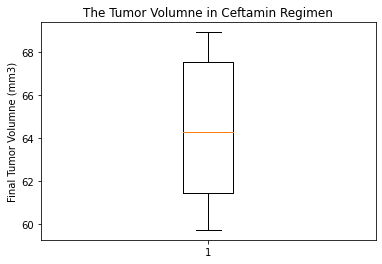

In [298]:
# Generate a box plot of the final tumor volume of each mouse across Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title("The Tumor Volumne in Ceftamin Regimen")
ax1.set_ylabel("Final Tumor Volumne (mm3)")
ax1.boxplot(ceft_obj)
plt.show()

In [299]:
# Generate a Line Plot of timepoint vs tumor volume for  a mouse treated with Capomulin
capomulin_dataframe = combined_data_df[combined_data_df["Drug Regimen"] == "Capomulin"]
capomulin_dataframe = capomulin_dataframe.reset_index()
capomulin_dataframe

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...,...
225,440,i557,Capomulin,Female,1,24,45,47.685963,1
226,1452,r157,Capomulin,Male,22,25,0,45.000000,0
227,1453,r157,Capomulin,Male,22,25,5,45.597064,0
228,1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [300]:
capomulin_mouse = capomulin_dataframe.loc[capomulin_dataframe["Mouse ID"] == "s185"]
capomulin_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


<AxesSubplot:xlabel='Timepoint'>

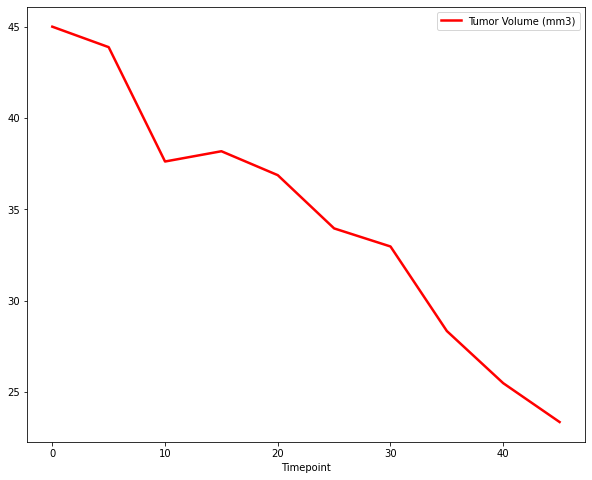

In [301]:
capomulin_mouse = capomulin_mouse.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
# Reset the index and generate a line plot showing the tumor volume for mice treated with Capomulin
capomulin_mouse = capomulin_mouse.reset_index(drop=True)
capomulin_mouse.set_index("Timepoint").plot(figsize=(10,8),linewidth=2.5,color="red")

In [302]:
# Arrange data in 3 columns: Mouse Id, Weight, Tumor Volumne
mouse_weight_df = capomulin_dataframe.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight_df

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876
...,...,...,...
225,i557,24,47.685963
226,r157,25,45.000000
227,r157,25,45.597064
228,r157,25,46.059608


## Correlation and Regression

In [303]:
# Get the average tumor volume for each mouse under Capomulin regemin
avg_capomuline = pd.DataFrame(mouse_weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capomuline                                                                              

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344
5,i557,24,44.805810
6,i738,20,39.141053
7,j119,23,44.465236
8,j246,21,43.216925
9,l509,21,44.434474


In [304]:
avg_capomuline = avg_capomuline.rename(columns={"Tumor Volume (mm3)":"Average Volume"})
avg_capomuline.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


<AxesSubplot:title={'center':'Weight vs. Average Tumor Volume'}, xlabel='Weight (g)', ylabel='Average Volume'>

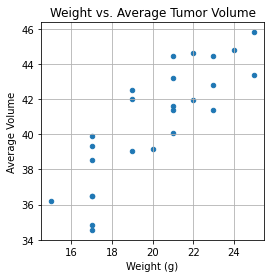

In [305]:
# Create the scatter plot of mouse weight compared to the avg tumor volumefor Capomulin
avg_capomuline.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4),title="Weight vs. Average Tumor Volume")

In [306]:
plt.clf()
plt.cla()
plt.close()

In [307]:
avg_capomuline.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [312]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight_corr = avg_capomuline['Weight (g)']
mouse_vol_corr = avg_capomuline['Average Volume']
corr = st.pearsonr(mouse_weight_corr,mouse_vol_corr)
print(f"The correlation between both Mouse weight and tumor volume is {round(corr[0],2)}")

The correlation between both Mouse weight and tumor volume is 0.84


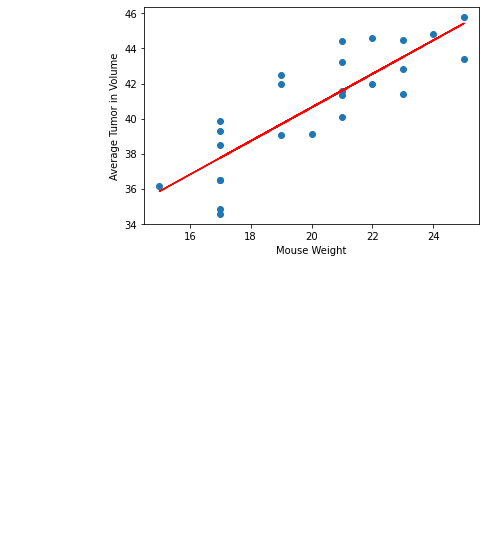

In [318]:
# Import linregress
from scipy.stats import linregress

# Add the lineear regression equation and line to the scatter plot
x_values = avg_capomuline["Weight (g)"]
y_values = avg_capomuline["Average Volume"]
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(10,16),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor in Volume")
plt.show()